## Manav Mangukiya Project
#Crop Recommendation System using ML

In [ ]:
import os
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Read dataset

In [ ]:
DATA_PATH = '../input/crop-recommendation-dataset/Crop_recommendation.csv'

In [ ]:
df = pd.read_csv(DATA_PATH)

### Available independent features
* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm

## Data preprocessing

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

### As you can see from the above description:
### Dataset has:
* No missing values
* 7 independent features and 1 dependent feature
* 2200 samples in each feature.
* Class balance
* Seems clean and preprocessed
* Therefore, we can directly use for training.


<AxesSubplot:>

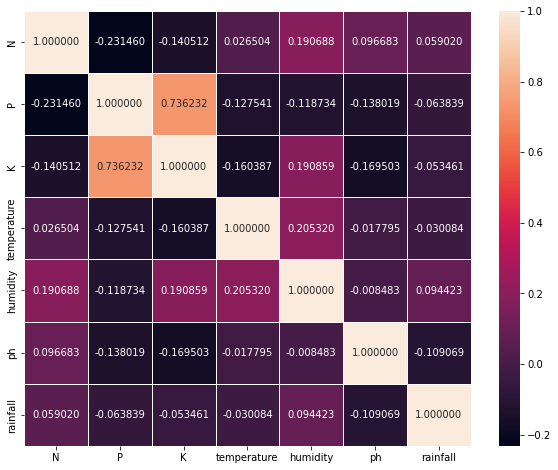

In [ ]:
correlation_mat = df.corr()
correlation_mat
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, linewidths=.5,annot=True, fmt="f")

In [ ]:
X = df.iloc[:,:-1]     # selecting all features except 'label' feature 
y = df.iloc[:,-1]      # selecting 'label' feature as dependent feature

In [ ]:
# Splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =2)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


## Model training

In [ ]:
KNN_model = KNeighborsClassifier()

In [ ]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

## Evaluating the model

In [ ]:
y_pred = KNN_model.predict(X_test)

## Visualize the results

In [ ]:
results = classification_report(y_test, y_pred)
print(results)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

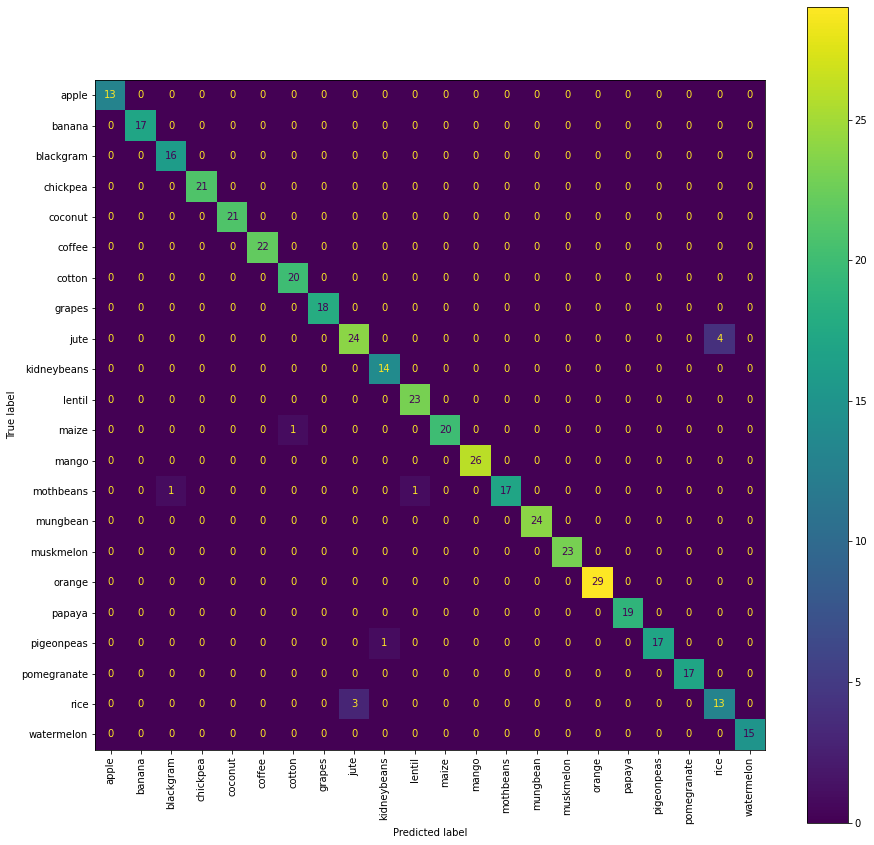

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred, labels=KNN_model.classes_)
figure, axes = plt.subplots(1, figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=KNN_model.classes_)
disp.plot(ax = axes, xticks_rotation='vertical') 

### As you can observe from the above heatmap is that:
* Accuracy of the model is 97%


## Model pickling

In [ ]:
# open a file, where you ant to store the data
file = open('KNN_model_crop_prediction.pkl', 'wb')
# dump information to that file
pickle.dump(KNN_model, file)

In [ ]:
###